In [1]:
# import Modules
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import timeit

In [2]:
# import stl file
stl_mesh = mesh.Mesh.from_file('3DBenchy.stl')
print("File loaded in as faces and vertices")

exception (False, "b'\\xd7\\xd3@\\x00\\x00\\xa0\\xbf\\xdfo\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x0b\\xd5\\xc1&*\\xaf\\xa0=\\xa0\\x1a\\xd3@\\xbe\\x9f\\x9a\\xbf\\xc3\\xf5\\x9aa)\\\\\\xd3@\\xa4p\\x9d\\xbfj\\xbc\\x9bam\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x86\\xaa\\xa9\\xa6*\\xaf\\xa0=)\\\\\\xd3@\\xa4p\\x9d\\xbfj\\xbc\\x9ba\\x81\\x95\\xd3@d;\\x9f\\xbf\\x1f\\x85\\x9cam\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x00\\x00\\xf95\\x7f\\xbf\\x1b\\x82\\x80%*\\xaf\\xa0=m\\xe7\\xd3@\\x00\\x00\\x00\\x00\\x12\\x83\\x9da\\x81\\x95\\xd3@d;\\x9f\\xbf\\x1f\\x85\\x9ca' should start with b'facet normal'")
File loaded in as faces and vertices


Line 0 values:
[[ 5.20566394  5.22952062  5.2533773   5.27723399  5.30109067  5.32494735
   5.34880404  5.37266072  5.3965174   5.42037409  5.44423077  5.46808745
   5.49194414  5.51580082  5.5396575   5.56351419  5.58737087  5.61122755
   5.63508424  5.65894092  5.6827976   5.70665429  5.73051097  5.75436765
   5.77822434  5.80208102  5.82593771  5.84979439  5.87365107  5.89750776
   5.92136444  5.94522112  5.96907781  5.99293449  6.01679117  6.04064786
   6.06450454  6.08836122  6.11221791  6.13607459  6.15993127  6.18378796
   6.20764464  6.23150132  6.25535801  6.27921469  6.30307137  6.32692806
   6.35078474  6.37464142  6.39849811  6.42235479  6.44621147  6.47006816
   6.49392484  6.51778152  6.54163821  6.56549489  6.58935157  6.61320826
   6.63706494]
 [ 5.68180586  5.69107533  5.7003448   5.70961427  5.71888374  5.72815321
   5.73742268  5.74669215  5.75596162  5.76523109  5.77450056  5.78377003
   5.7930395   5.80230898  5.81157845  5.82084792  5.83011739  5.83938686
   5.848

C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/715804349.py:17: RuntimeWarning: divide by zero encountered in true_divide
  t[1,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][1,2])/(stl_mesh.vectors[face][2,2]-stl_mesh.vectors[face][1,2]))
C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/715804349.py:21: RuntimeWarning: invalid value encountered in multiply
  II1 = np.array((stl_mesh.vectors[face][2,:]-stl_mesh.vectors[face][1,:]).reshape(-1,1)*t[1,:] + stl_mesh.vectors[face][1,:].reshape(-1,1))


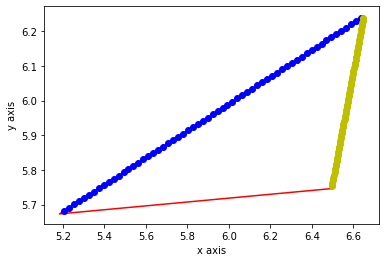

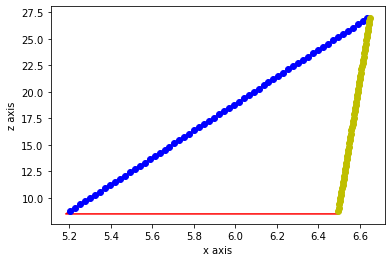

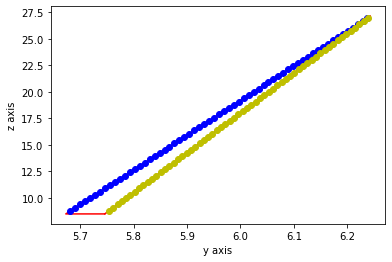

In [3]:
face = 1770# check face

zz = np.linspace(0,30,100) # z slices

## solve for all z intercepts
# calculate boundarys
x_lim = np.array([stl_mesh.vectors[face][:,0].min(),stl_mesh.vectors[face][:,0].max()])
y_lim = np.array([stl_mesh.vectors[face][:,1].min(),stl_mesh.vectors[face][:,1].max()])
z_lim = np.array([stl_mesh.vectors[face][:,2].min(),stl_mesh.vectors[face][:,2].max()])

idx = np.where((zz>z_lim[0]) & (zz<z_lim[1]))[0]

# solve line intercept parameter value
t = np.zeros([3,len(idx)])

t[0,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][0,2])/(stl_mesh.vectors[face][1,2]-stl_mesh.vectors[face][0,2]))
t[1,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][1,2])/(stl_mesh.vectors[face][2,2]-stl_mesh.vectors[face][1,2]))
t[2,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][2,2])/(stl_mesh.vectors[face][0,2]-stl_mesh.vectors[face][2,2]))

II0 = np.array((stl_mesh.vectors[face][1,:]-stl_mesh.vectors[face][0,:]).reshape(-1,1)*t[0,:] + stl_mesh.vectors[face][0,:].reshape(-1,1))
II1 = np.array((stl_mesh.vectors[face][2,:]-stl_mesh.vectors[face][1,:]).reshape(-1,1)*t[1,:] + stl_mesh.vectors[face][1,:].reshape(-1,1))
II2 = np.array((stl_mesh.vectors[face][0,:]-stl_mesh.vectors[face][2,:]).reshape(-1,1)*t[2,:] + stl_mesh.vectors[face][2,:].reshape(-1,1))

# remove points outside of bounds
idx0 = ((II0[0,:]<stl_mesh.vectors[face][[0,1],0].min()) + (II0[0,:]>stl_mesh.vectors[face][[0,1],0].max()) 
        + (II0[1,:]<stl_mesh.vectors[face][[0,1],1].min()) + (II0[1,:]>stl_mesh.vectors[face][[0,1],1].max())
        + (II0[2,:]<stl_mesh.vectors[face][[0,1],2].min()) + (II0[2,:]>stl_mesh.vectors[face][[0,1],2].max()))
idx1 = ((II1[0,:]<stl_mesh.vectors[face][[1,2],0].min()) + (II1[0,:]>stl_mesh.vectors[face][[1,2],0].max()) 
        + (II1[1,:]<stl_mesh.vectors[face][[1,2],1].min()) + (II1[1,:]>stl_mesh.vectors[face][[1,2],1].max())
        + (II1[2,:]<stl_mesh.vectors[face][[1,2],2].min()) + (II1[2,:]>stl_mesh.vectors[face][[1,2],2].max()))
idx2 = ((II2[0,:]<stl_mesh.vectors[face][[0,2],0].min()) + (II2[0,:]>stl_mesh.vectors[face][[0,2],0].max()) 
        + (II2[1,:]<stl_mesh.vectors[face][[0,2],1].min()) + (II2[1,:]>stl_mesh.vectors[face][[0,2],1].max())
        + (II2[2,:]<stl_mesh.vectors[face][[0,2],2].min()) + (II2[2,:]>stl_mesh.vectors[face][[0,2],2].max()))
II0[:,idx0] = 0
II1[:,idx1] = 0
II2[:,idx2] = 0

# combine points into pairs of points that can be stored easily
# find the ONE line that has all points within bonds. This is the base line
# the secondary points are the sum of the other two points becuase index above 
# sets outof bounds points to zero
if(sum(idx0)==0):
        P1 = II0
        P2 = II1 + II2
elif(sum(idx1)==0):
        P1 = II1
        P2 = II0 + II2
else:
        P1 = II2
        P2 = II0 + II1

# print point values
print("Line 0 values:")
print(II0)
print("Line 1 values:")
print(II1)
print("Line 2 values:")
print(II2)

#P1 = II2
#P2 = II0 + II1

print(" ")
print("points 1:")
print(P1)
print("points 2:")
print(P2)
print(" ")

# plot triangle sliced at all layers
# rough fix because set to zero above (not nan anymore)
II0[:,idx0] = np.nan
II1[:,idx1] = np.nan
II2[:,idx2] = np.nan
# print points
print("x0,y0,z0")
print("x1,y1,z1")
print("x2,y2,z2")
print("%.8f"%stl_mesh.vectors[face][0,0]," %.8f"%stl_mesh.vectors[face][0,1]," %.8f"%stl_mesh.vectors[face][0,2])
print("%.8f"%stl_mesh.vectors[face][1,0]," %.8f"%stl_mesh.vectors[face][1,1]," %.8f"%stl_mesh.vectors[face][1,2])
print("%.8f"%stl_mesh.vectors[face][2,0]," %.8f"%stl_mesh.vectors[face][2,1]," %.8f"%stl_mesh.vectors[face][2,2])

# plot face 
plt.plot(stl_mesh.vectors[face][:,0],stl_mesh.vectors[face][:,1],"r")
plt.plot(stl_mesh.vectors[face][[2,0],0],stl_mesh.vectors[face][[2,0],1],"r")
plt.plot(II0[0],II0[1],"o b")
plt.plot(II1[0],II1[1],"o g")
plt.plot(II2[0],II2[1],"o y")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

plt.plot(stl_mesh.vectors[face][:,0],stl_mesh.vectors[face][:,2],"r")
plt.plot(stl_mesh.vectors[face][[2,0],0],stl_mesh.vectors[face][[2,0],2],"r")
plt.plot(II0[0],II0[2],"o b")
plt.plot(II1[0],II1[2],"o g")
plt.plot(II2[0],II2[2],"o y")
plt.xlabel("x axis")
plt.ylabel("z axis")
plt.show()

plt.plot(stl_mesh.vectors[face][:,1],stl_mesh.vectors[face][:,2],"r")
plt.plot(stl_mesh.vectors[face][[2,0],1],stl_mesh.vectors[face][[2,0],2],"r")
plt.plot(II0[1],II0[2],"o b")
plt.plot(II1[1],II1[2],"o g")
plt.plot(II2[1],II2[2],"o y")
plt.xlabel("y axis")
plt.ylabel("z axis")
plt.show()

In [4]:
print(P1)
print(P2)
P3 = np.append(P1,P2,1)
print(P3)

print("P1 size: ",P1.shape)
print("P1 size: ",P2.shape)
print("P1 size: ",P3.shape)


[[ 5.20566394  5.22952062  5.2533773   5.27723399  5.30109067  5.32494735
   5.34880404  5.37266072  5.3965174   5.42037409  5.44423077  5.46808745
   5.49194414  5.51580082  5.5396575   5.56351419  5.58737087  5.61122755
   5.63508424  5.65894092  5.6827976   5.70665429  5.73051097  5.75436765
   5.77822434  5.80208102  5.82593771  5.84979439  5.87365107  5.89750776
   5.92136444  5.94522112  5.96907781  5.99293449  6.01679117  6.04064786
   6.06450454  6.08836122  6.11221791  6.13607459  6.15993127  6.18378796
   6.20764464  6.23150132  6.25535801  6.27921469  6.30307137  6.32692806
   6.35078474  6.37464142  6.39849811  6.42235479  6.44621147  6.47006816
   6.49392484  6.51778152  6.54163821  6.56549489  6.58935157  6.61320826
   6.63706494]
 [ 5.68180586  5.69107533  5.7003448   5.70961427  5.71888374  5.72815321
   5.73742268  5.74669215  5.75596162  5.76523109  5.77450056  5.78377003
   5.7930395   5.80230898  5.81157845  5.82084792  5.83011739  5.83938686
   5.84865633  5.857925

In [5]:
# create slicer now that stores all intecepting pionts 

#check if code works for all faces in the stl
zz = np.linspace(0,30,150) # z slices

# save all points
Set_1 = np.zeros([3,0])
Set_2 = np.zeros([3,0])

# save faces that dont would through error
Bad_Faces = np.array([])

start = timeit.default_timer() #start timer

l = len(stl_mesh.vectors[:])
#l = 50000*2
for face in range(l):
    # check if face is actually a line (bad stl file)
    v1 = stl_mesh.vectors[face][0,:] - stl_mesh.vectors[face][1,:]
    v2 = stl_mesh.vectors[face][1,:] - stl_mesh.vectors[face][2,:] 
    v3 = stl_mesh.vectors[face][2,:] - stl_mesh.vectors[face][0,:]
    # check that face intercept z point
    z_lim = np.array([stl_mesh.vectors[face][:,2].min(),stl_mesh.vectors[face][:,2].max()])
    inter = (z_lim[0]-zz)*(z_lim[1]-zz) < 0
    
    if np.any(np.all(v1==0) or np.all(v2==0) or np.all(v3==0) or np.all(inter)):
        Bad_Faces = np.append(Bad_Faces,face) # for debugging
        # just compute random task
    else:
        
        # code used to find slice lines
        t = np.zeros([3]) # initilaize line parameter

        ## solve for all z intercepts
        idx = np.where((zz>z_lim[0]) & (zz<z_lim[1]))[0]

        # solve line intercept parameter value
        t = np.zeros([3,len(idx)])

        t[0,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][0,2])/(stl_mesh.vectors[face][1,2]-stl_mesh.vectors[face][0,2]))
        t[1,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][1,2])/(stl_mesh.vectors[face][2,2]-stl_mesh.vectors[face][1,2]))
        t[2,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][2,2])/(stl_mesh.vectors[face][0,2]-stl_mesh.vectors[face][2,2]))

        II0 = np.array((stl_mesh.vectors[face][1,:]-stl_mesh.vectors[face][0,:]).reshape(-1,1)*t[0,:] + stl_mesh.vectors[face][0,:].reshape(-1,1))
        II1 = np.array((stl_mesh.vectors[face][2,:]-stl_mesh.vectors[face][1,:]).reshape(-1,1)*t[1,:] + stl_mesh.vectors[face][1,:].reshape(-1,1))
        II2 = np.array((stl_mesh.vectors[face][0,:]-stl_mesh.vectors[face][2,:]).reshape(-1,1)*t[2,:] + stl_mesh.vectors[face][2,:].reshape(-1,1))

        # remove points outside of bounds
        idx0 = ((II0[0,:]<stl_mesh.vectors[face][[0,1],0].min()) + (II0[0,:]>stl_mesh.vectors[face][[0,1],0].max()) 
            + (II0[1,:]<stl_mesh.vectors[face][[0,1],1].min()) + (II0[1,:]>stl_mesh.vectors[face][[0,1],1].max())
            + (II0[2,:]<stl_mesh.vectors[face][[0,1],2].min()) + (II0[2,:]>stl_mesh.vectors[face][[0,1],2].max()))
        idx1 = ((II1[0,:]<stl_mesh.vectors[face][[1,2],0].min()) + (II1[0,:]>stl_mesh.vectors[face][[1,2],0].max()) 
            + (II1[1,:]<stl_mesh.vectors[face][[1,2],1].min()) + (II1[1,:]>stl_mesh.vectors[face][[1,2],1].max())
            + (II1[2,:]<stl_mesh.vectors[face][[1,2],2].min()) + (II1[2,:]>stl_mesh.vectors[face][[1,2],2].max()))
        idx2 = ((II2[0,:]<stl_mesh.vectors[face][[0,2],0].min()) + (II2[0,:]>stl_mesh.vectors[face][[0,2],0].max()) 
            + (II2[1,:]<stl_mesh.vectors[face][[0,2],1].min()) + (II2[1,:]>stl_mesh.vectors[face][[0,2],1].max())
            + (II2[2,:]<stl_mesh.vectors[face][[0,2],2].min()) + (II2[2,:]>stl_mesh.vectors[face][[0,2],2].max()))
        
        # save points for every intercept for every z level...
        II0[:,idx0] = 0
        II1[:,idx1] = 0
        II2[:,idx2] = 0

        # combine points into pairs of points that can be stored easily
        # find the ONE line that has all points within bonds. This is the base line
        # the secondary points are the sum of the other two points becuase index above 
        # sets outof bounds points to zero
        if(sum(idx0)==0):
                P1 = II0
                P2 = II1 + II2
        elif(sum(idx1)==0):
                P1 = II1
                P2 = II0 + II2
        else:
                P1 = II2
                P2 = II0 + II1
        
        Set_1 = np.append(Set_1,P1,axis=1)
        Set_2 = np.append(Set_2,P2,axis=1)
       
stop = timeit.default_timer()
print("Time to computer ",face+1," was ",stop-start," [s]")
print("Predicted time to compute hole file is ",(stop-start)*len(stl_mesh.vectors[:])/(face+1))
print(" ")
print("Num of Bad Faces: ",len(Bad_Faces)," Total Num of Faces: ",len(stl_mesh.vectors[:]))

C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/219909895.py:42: RuntimeWarning: divide by zero encountered in true_divide
  t[2,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][2,2])/(stl_mesh.vectors[face][0,2]-stl_mesh.vectors[face][2,2]))
C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/219909895.py:46: RuntimeWarning: invalid value encountered in multiply
  II2 = np.array((stl_mesh.vectors[face][0,:]-stl_mesh.vectors[face][2,:]).reshape(-1,1)*t[2,:] + stl_mesh.vectors[face][2,:].reshape(-1,1))
C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/219909895.py:40: RuntimeWarning: divide by zero encountered in true_divide
  t[0,:] = np.transpose((zz[idx]-stl_mesh.vectors[face][0,2])/(stl_mesh.vectors[face][1,2]-stl_mesh.vectors[face][0,2]))
C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/219909895.py:44: RuntimeWarning: invalid value encountered in multiply
  II0 = np.array((stl_mesh.vectors[face][1,:]-stl_mesh.vectors[face][0,:]).reshape(-1,1)*t[0,:] + stl_mesh.vectors[face][0,:].res

Time to computer  225706  was  289.9591991000343  [s]
Predicted time to compute hole file is  289.9591991000343
 
Num of Bad Faces:  552  Total Num of Faces:  225706


Z height is:  20.13422818791946
shape of Set 1: (3, 201613)
shape of Set 2: (3, 201613)


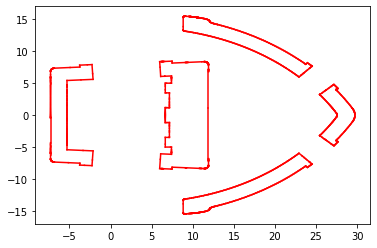

In [6]:
# plot slice of object
ind = 100
print("Z height is: ",zz[ind])
print("shape of Set 1:",Set_1.shape)
print("shape of Set 2:",Set_2.shape)

idx = Set_1[2,:] == zz[ind] # find all points on that zz height
p1 = Set_1[0:2,idx] # first set of points [x1,y1]
p2 = Set_2[0:2,idx] # 2nd set of points [x2,y2]

for i in range(sum(idx)):
    plt.plot([p1[0,i],p2[0,i]],[p1[1,i],p2[1,i]],"r")
plt.show()

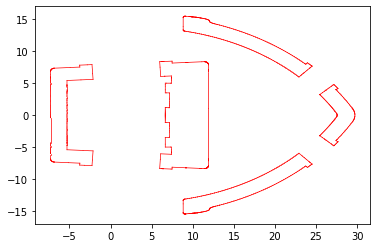

In [7]:
# create Image of a layer

# Plot Slice
ind = 100 # slice number

idx = Set_1[2,:] == zz[ind] # find all points on that zz height
p1 = Set_1[0:2,idx] # first set of points [x1,y1]
p2 = Set_2[0:2,idx] # 2nd set of points [x2,y2]

for i in range(sum(idx)):
    plt.plot([p1[0,i],p2[0,i]],[p1[1,i],p2[1,i]],linewidth=0.7,c="r")
plt.show()

horizontal
num of out of bound intersections:  21  Total num of points  1838
variables
[ True  True  True ...  True  True  True]
1817
1838


C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/3179627095.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x = (rays[1,int(num/2)]*outline[2,:]-outline[1,:]*rays[2,int(num/2)])/(rays[0,int(num/2)]*outline[1,:]-outline[0,:]*rays[1,int(num/2)])
C:\Users\kaden\AppData\Local\Temp/ipykernel_5832/3179627095.py:39: RuntimeWarning: invalid value encountered in true_divide
  y = -(rays[2,int(num/2)]*outline[0,:]-outline[2,:]*rays[0,int(num/2)])/(rays[0,int(num/2)]*outline[1,:]-outline[0,:]*rays[1,int(num/2)])


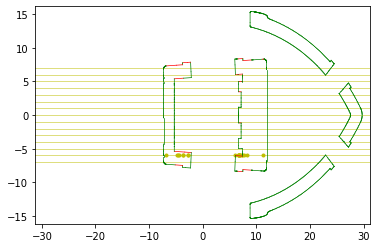

In [85]:
# Create array of lines
theta = 0*np.pi/180 # angle of lines
space = 1 # spacing between lines
num = 15 # number of lines

# iterction math: https://www.cuemath.com/geometry/intersection-of-two-lines/
rays = np.zeros([3,num]) # empty matrix with a,b and c values ax+by+c=0
if (theta == 0): #horizontal lines
    print("horizontal")
    rays[0,:] = 0
    rays[1,:] = 1
    rays[2,:] = np.arange(0, space*num,space) - num*space/2 + space/2
elif (theta == np.pi/2): # vertical lines
    print("Vertical")
    rays[0,:] = 1
    rays[1,:] = 0
    rays[2,:] = np.arange(0, space*num,space) - num*space/2 + space/2
else:
    print("angle")
    rays[0,:] = np.tan(theta)
    rays[1,:] = 1
    rays[2,:] = (np.arange(0, space*num,space) - num*space/2 + space/2)/np.abs(np.cos(theta))


# find intercetions for each line

# going through each line and find each intersecting rays 
# and its point. Then stores value
#  
# find a,b, and c value for points of line ax+by+c=0
outline = np.zeros([3,len(p1[0,:])])
outline[0,:] = p2[0,:] - p1[0,:]
outline[1,:] = p2[1,:] - p1[1,:]
outline[2,:] = -outline[0,:]*p1[0,:] - outline[1,:]*p1[1,:]

# find intercepts (currently one line only int(num/2))
num = 3
x = (rays[1,int(num/2)]*outline[2,:]-outline[1,:]*rays[2,int(num/2)])/(rays[0,int(num/2)]*outline[1,:]-outline[0,:]*rays[1,int(num/2)])
y = -(rays[2,int(num/2)]*outline[0,:]-outline[2,:]*rays[0,int(num/2)])/(rays[0,int(num/2)]*outline[1,:]-outline[0,:]*rays[1,int(num/2)])
num = 15
# filter out points that are not inbtween the two points
xmin = np.min([p1[0,:],p2[0,:]],axis=0)
xmax = np.max([p1[0,:],p2[0,:]],axis=0)
ymin = np.min([p1[1,:],p2[1,:]],axis=0)
ymax = np.max([p1[1,:],p2[1,:]],axis=0)

ind = ((xmin>=x) | (xmax<=x))
#ind.astype(bool)

x[ind] = np.NaN
y[ind] = np.NaN

print("num of out of bound intersections: ",len(ind)-np.sum(ind)," Total num of points ",len(ind))

# plot results
# plot intersection points
print("variables")
print(ind)
print(len(x[ind]))
print(len(x))
plt.plot(x,y,".y")

# generate rays
if (theta==90*np.pi/180): # for vertical lines
    Y1line = np.ones(num)*-50
    X1line = (rays[1,:]*Y1line-rays[2,:])/rays[0,:]
    Y2line = np.ones(num)*50
    X2line = (rays[1,:]*Y2line-rays[2,:])/rays[0,:]
else: # all other cases
    X1line = np.ones(num)*-50
    Y1line = (rays[0,:]*X1line-rays[2,:])/rays[1,:]
    X2line = np.ones(num)*50
    Y2line = (rays[0,:]*X2line-rays[2,:])/rays[1,:]

# plot rays
for i in range(num):
    plt.plot( [X1line[i],X2line[i]],[Y1line[i],Y2line[i]],linewidth=0.5,c="y") # plot lines

# plot slice
for i in range(sum(idx)): # plot slice (outline)
    if (ind[i]):
        plt.plot([p1[0,i],p2[0,i]],[p1[1,i],p2[1,i]],linewidth=0.7,c="g")
    else:
        plt.plot([p1[0,i],p2[0,i]],[p1[1,i],p2[1,i]],linewidth=0.7,c="r")

xlim = np.max(np.abs(p1[0,:]))*1.05
ylim = np.max(np.abs(p1[1,:]))*1.05
plt.xlim(-xlim,xlim)
plt.ylim(-ylim,ylim)
#plt.xlim(7.5,12)
#plt.ylim(14,ylim)
plt.show()

 a
 b
 c

[[ 1  1  1]
 [-1 -1 -1]
 [-1  0  1]]
[[ 5  5  5  5]
 [-1 -1 -1 -1]
 [ 1  0 -1 -2]]
[-2. -2. -2.]
[-3. -2. -1.]


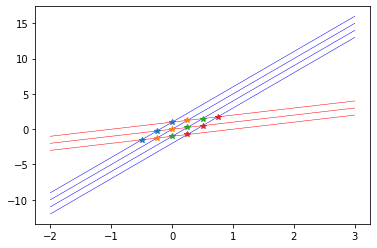

In [181]:
def Line_Intersection(P1,P2):
    # takes P = [[a],[b],[c]] where ax+by+C=0
    # returns points of intersection [x,y]
    # for all possible line combose
    x = (np.outer(P1[1],P2[2])-np.outer(P1[2],P2[1]))/(np.outer(P1[0],P2[1])-np.outer(P1[1],P2[0]))
    y = (np.outer(P1[2],P2[0])-np.outer(P1[0],P2[2]))/(np.outer(P1[0],P2[1])-np.outer(P1[1],P2[0]))
    return [x,y]

# Test function
P1 = np.array([[1,-1,-1],[1,-1,0],[1,-1,1]]).T
P2 = np.array([[5,-1,1],[5,-1,0],[5,-1,-1],[5,-1,-2]]).T

print(" a\n b\n c\n")
print(P1)
print(P2)
Xp,Yp = Line_Intersection(P1,P2)

# plot lines
X1line1 = -np.ones(len(P1[0]))*2
Y1line1 = (-P1[0]*X1line1-P1[2])/P1[1]
X2line1 = np.ones(len(P1[0]))*3
Y2line1 = (-P1[0]*X2line1-P1[2])/P1[1]

X1line2 = -np.ones(len(P2[0]))*2
Y1line2 = (-P2[0]*X1line2-P2[2])/P2[1]
X2line2 = np.ones(len(P2[0]))*3
Y2line2 = (-P2[0]*X2line2-P2[2])/P2[1]
print(X1line1)
print(Y1line1)
for i in range(len(P1[0])):
    plt.plot( [X1line1[i],X2line1[i]],[Y1line1[i],Y2line1[i]],linewidth=0.5,c="r") # plot lines
for i in range(len(P2[0])):
    plt.plot( [X1line2[i],X2line2[i]],[Y1line2[i],Y2line2[i]],linewidth=0.5,c="b") # plot lines
# plot intersection
plt.plot(Xp,Yp,'*')
plt.show()

In [209]:
def Line_Generator(P1,P2):
    # takes to points P = [[x],[y]]
    # returns vector of a,b,c for line
    # ax+by+c=0
    a =-(P2[1] - P1[1])
    b = P2[0] - P1[0]
    c = -P1[0]*a - P1[1]*b
    return np.array([a,b,c])

P1 = np.array([[0,0],[1,1]]).T
P2 = np.array([[3,3],[-1,0]])
Vector = Line_Generator(P1,P2)
print("P1: ",P1)
print("P2: ",P2)
print("a,b,c ",Vector)

# get y values from forumula
x1 = P1[0,0] # first line first point
y1 = -(Vector[0,0]*x1+Vector[2,0])/Vector[1,0]
print(" ")
print("P1 x,y: ",P1[:,0])
print("x1,y1",x1,y1)

x1 = P2[0,0] # first line second point
y1 = -(Vector[0,0]*x1+Vector[2,0])/Vector[1,0]
print(" ")
print("P1 x,y: ",P2[:,0])
print("x1,y1",x1,y1)

x1 = P2[0,1] # second line second point
y1 = -(Vector[0,1]*x1+Vector[2,1])/Vector[1,1]
print(" ")
print("P1 x,y: ",P2[:,1])
print("x1,y1",x1,y1)

P1:  [[0 1]
 [0 1]]
P2:  [[ 3  3]
 [-1  0]]
a,b,c  [[ 1  1]
 [ 3  2]
 [ 0 -3]]
 
P1 x,y:  [0 0]
x1,y1 0 0.0
 
P1 x,y:  [ 3 -1]
x1,y1 3 -1.0
 
P1 x,y:  [3 0]
x1,y1 3 0.0


points [[x1 x2][y1 y2]]
[[0 3]
 [1 3]] [[1 3]
 [0 0]]
Intercepts
[[ 0.5  3. ]
 [-3.   3. ]] [[0.5 0.5]
 [4.  4. ]]
[0.5 0.5] [4. 4.]
[[False False]
 [ True  True]]
[[0.5 3. ]
 [nan nan]] [[0.5 0.5]
 [nan nan]]


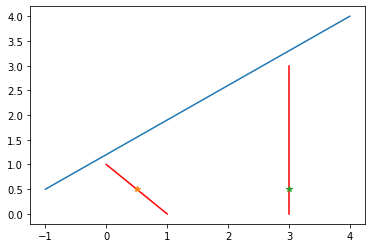

In [232]:
# get rid out points that are not within point bounds
P1 = np.array([[0,3],[1,3]])
P2 = np.array([[1,3],[0,0]])

ray = np.array([[0,0],[1,1],[-0.5,-4]])

line = Line_Generator(P1,P2)

Xp,Yp = Line_Intersection(ray,line)

print("points [[x1 x2][y1 y2]]")
print(P1,P2)
print("Intercepts")
print(Xp,Yp)

# plot lines
x1 = np.ones(len(ray[0,:]))*-1
y1 = -ray[0,0]*x1/ray[1,0]-ray[2,0]/ray[1,0]
x2 = np.ones(len(ray[0,:]))*4
y2 = -ray[0,1]*x1/ray[1,1]-ray[2,1]/ray[1,1]
print(y1,y2)
plt.plot([-1,4],[0.5,4])
plt.plot(P1,P2,"r")

# Filter boundary
def Out_Of_Bound(x,y,P1,P2):
    # takes points of intersection of lines and
    # points of lines. replaces all points not 
    # inbetween P1, P2 returns x,y
    xmax = np.max([P1[0],P2[0]],axis=0)
    xmin = np.min([P1[0],P2[0]],axis=0)
    ymax = np.max([P1[1],P2[1]],axis=0)
    ymin = np.min([P1[1],P2[1]],axis=0)
    idx = ((x<xmin) | (x>xmax)) | ((y<ymin) | (y>ymax))
    print(idx)
    x[idx] = np.NaN
    y[idx] = np.NaN
    return x,y

xpp,ypp = Out_Of_Bound(Xp,Yp,P1,P2)
print(xpp,ypp)

# plot results
plt.plot(xpp,ypp,"*")
plt.show()